In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

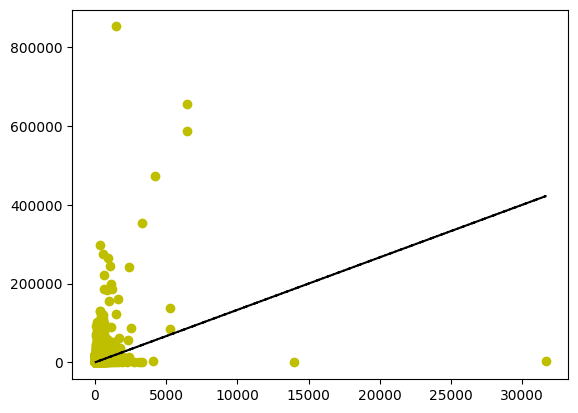

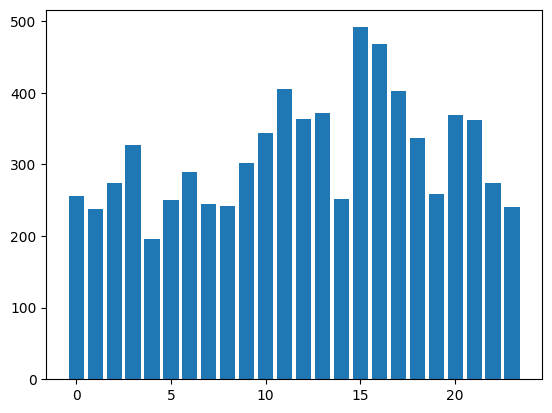

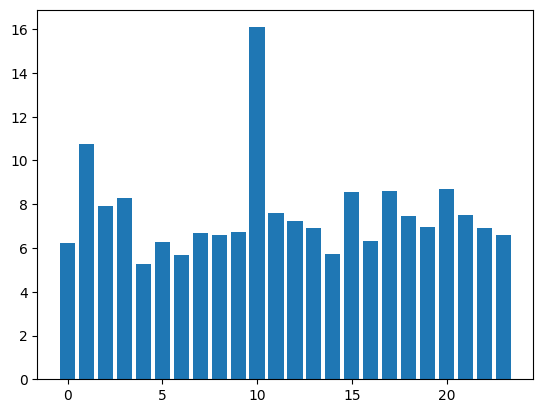

In [39]:
CHUNK_SIZE = 100000
chunk = pd.read_csv('instagram_posts.csv',sep='\t',chunksize=CHUNK_SIZE)
hour_data = np.array([])
numbr_comments_data = np.array([])
numbr_likes_data = np.array([])
hour_count = np.zeros((24,))
like_count = np.zeros((24,))
comment_count = np.zeros((24,))
hours = np.array([hour for hour in range(24)])
for data in chunk:
    hour_data = (pd.to_datetime(data["cts"]).apply(lambda x: x.hour)) #.to_numpy(dtype='datetime64')
    numbr_likes_data = data["numbr_likes"]
    numbr_comments_data = data["number_comments"]
    for index in range(CHUNK_SIZE):
        hour_count[hour_data[index]] += 1
        like_count[hour_data[index]] += numbr_likes_data[index]
        comment_count[hour_data[index]] += numbr_comments_data[index]
    slope, y_intercept = np.polyfit(numbr_comments_data, numbr_likes_data, 1)
    plt.plot(numbr_comments_data, numbr_likes_data, 'yo', numbr_comments_data, slope*numbr_comments_data+y_intercept, '--k')
    plt.show()
    plt.bar(hours, np.divide(like_count,hour_count))
    # print(np.divide(like_count,hour_count))
    plt.show()
    plt.bar(hours, np.divide(comment_count,hour_count))
    # print(np.divide(comment_count,hour_count))
    plt.show()
    break